In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read and merge data

In [22]:
unit = pd.read_csv('DATA/JRC_OPEN_UNITS.csv')
perf = pd.read_csv('DATA/JRC_OPEN_PERFORMANCE.csv')
temp = pd.read_csv('DATA/JRC_OPEN_TEMPORAL.csv')
perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7117 entries, 0 to 7116
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   eic_p              7023 non-null   object 
 1   eic_g              6815 non-null   object 
 2   min_load           5756 non-null   float64
 3   ramp_up            5756 non-null   float64
 4   ramp_down          5756 non-null   float64
 5   minimum_up_time    5749 non-null   float64
 6   minimum_down_time  5749 non-null   float64
 7   eff                1743 non-null   float64
 8   best_source        1743 non-null   object 
dtypes: float64(6), object(3)
memory usage: 500.5+ KB


In [23]:
# Use the temp dataset as the base as it contains the operation characteristics of the plants, including emissions

data = temp.merge(unit, how='left', on=['eic_p','eic_g','type_g'])
data = data.merge(perf, how='left', on=['eic_p','eic_g'])
data

,eic_p,eic_g,type_g,cyear,Generation,cf,time_coverage,co2emitted,name_p,name_g,...,cooling_type,water_withdrawal,water_consumption,min_load,ramp_up,ramp_down,minimum_up_time,minimum_down_time,eff,best_source
0,18WABO1-12345-0X,18WABO1-12345-D7,Fossil Hard coal,2015,1872563,0.626,1.000,1.940210e+09,ABOÑO 1,ABOÑO 1,...,Once-through,137.59,0.95,0.479,0.009,-0.013,221.0,134.0,0.32,Class_derived
1,18WABO2-12345-0N,18WABO2-12345-DY,Fossil Hard coal,2015,4056615,0.864,1.000,3.842890e+09,ABOÑO 2,ABOÑO 2,...,Once-through,137.59,0.95,0.280,0.011,-0.013,211.0,69.0,0.35,Class_derived
2,48WSTN0000ABTHBN,48W0000000ABTH7Y,Fossil Hard coal,2015,2216884,0.617,0.767,2.625680e+09,ABTHB,ABTH7,...,Once-through,137.59,0.95,0.280,0.011,-0.013,211.0,69.0,0.30,emissions_16_derived
3,48WSTN000ABTHGTK,48W000000ABTH7G2,Fossil Oil,2015,12,0.706,0.000,1.309290e+04,ABTHGT,ABTH7G,...,Air Cooling,0.10,0.10,0.182,0.013,-0.014,60.0,85.0,0.26,emissions_16_derived
4,48WSTN0000ABTHBN,48W0000000ABTH8W,Fossil Hard coal,2015,2308023,0.622,0.791,2.733620e+09,ABTHB,ABTH8,...,Once-through,137.59,0.95,0.280,0.011,-0.013,211.0,69.0,0.30,emissions_16_derived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6719,19W0000000001195,19W000000000121I,Fossil Hard coal,2018,814754,0.407,0.995,7.927790e+08,Łaziska 3,Łaziska 3 B09,...,Natural Draught Tower,2.22,1.81,0.479,0.009,-0.013,221.0,134.0,0.35,emissions_15_derived
6720,19W0000000001195,19W000000000122G,Fossil Hard coal,2018,698048,0.356,0.995,6.792210e+08,Łaziska 3,Łaziska 3 B10,...,Natural Draught Tower,2.22,1.81,0.479,0.009,-0.013,221.0,134.0,0.35,emissions_15_derived
6721,19W0000000001195,19W000000000124C,Fossil Hard coal,2018,841745,0.429,0.995,8.190420e+08,Łaziska 3,Łaziska 3 B11,...,Natural Draught Tower,2.22,1.81,0.479,0.009,-0.013,221.0,134.0,0.35,emissions_15_derived
6722,19W0000000001195,19W0000000001268,Fossil Hard coal,2018,675755,0.345,0.995,6.575290e+08,Łaziska 3,Łaziska 3 B12,...,Natural Draught Tower,2.22,1.81,0.479,0.009,-0.013,221.0,134.0,0.35,emissions_15_derived


In [24]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6724 entries, 0 to 6723
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   eic_p                6724 non-null   object 
 1   eic_g                6724 non-null   object 
 2   type_g               6724 non-null   object 
 3   cyear                6724 non-null   int64  
 4   Generation           6724 non-null   int64  
 5   cf                   6715 non-null   float64
 6   time_coverage        6724 non-null   float64
 7   co2emitted           6335 non-null   float64
 8   name_p               6650 non-null   object 
 9   name_g               6650 non-null   object 
 10  capacity_p           6650 non-null   float64
 11  capacity_g           6650 non-null   float64
 12  lat                  6628 non-null   float64
 13  lon                  6628 non-null   float64
 14  country              6650 non-null   object 
 15  NUTS2                6628 non-null   o

In [25]:
data.describe()

,cyear,Generation,cf,time_coverage,co2emitted,capacity_p,capacity_g,lat,lon,year_commissioned,year_decommissioned,water_withdrawal,water_consumption,min_load,ramp_up,ramp_down,minimum_up_time,minimum_down_time,eff
count,6724.000000,6.724000e+03,6715.000000,6724.000000,6.335000e+03,6650.000000,6650.000000,6628.000000,6628.000000,5422.000000,206.000000,5069.000000,5069.000000,6663.000000,6663.000000,6663.000000,6642.000000,6642.000000,4141.000000
mean,2016.477692,1.140533e+06,0.370266,0.873143,4.810826e+08,820.732105,320.297985,48.726992,8.081518,1983.127813,2015.786408,42.281740,0.999020,0.310255,0.011573,-0.013217,837.719211,107.076784,0.399843
std,1.123998,1.805361e+06,0.282031,0.265887,9.346597e+08,835.543651,271.640236,6.076467,10.211452,20.463764,1.832767,59.573854,0.793153,0.165961,0.002333,0.001423,3992.583262,81.125607,0.097467
min,2015.000000,-2.220400e+04,-0.021000,0.000000,-8.616990e+05,0.000000,0.000000,36.184000,-9.423000,1899.000000,2007.000000,0.000000,0.000000,0.028000,0.001000,-0.015000,30.000000,30.000000,0.230000
25%,2015.000000,1.064795e+05,0.117000,0.939500,0.000000e+00,268.250000,131.000000,44.386000,-0.865000,1972.000000,2015.000000,0.960000,0.380000,0.185000,0.009000,-0.014000,60.000000,60.000000,0.330000
50%,2016.000000,4.530965e+05,0.331000,0.997000,8.185150e+06,584.000000,233.000000,49.858000,7.717000,1982.000000,2016.000000,2.220000,0.910000,0.308000,0.011000,-0.013000,151.000000,71.000000,0.360000
75%,2017.000000,1.347804e+06,0.600000,1.000000,6.092225e+08,1065.000000,411.900000,52.481000,16.684000,2000.000000,2017.000000,46.270000,1.810000,0.479000,0.014000,-0.013000,224.000000,116.000000,0.520000
max,2018.000000,1.203326e+07,1.566000,1.000000,7.856350e+09,5472.000000,1500.000000,67.732000,28.126000,2020.000000,2020.000000,167.870000,3.130000,0.901000,0.015000,-0.001000,63030.000000,560.000000,0.560000


## Missing data

<Axes: >

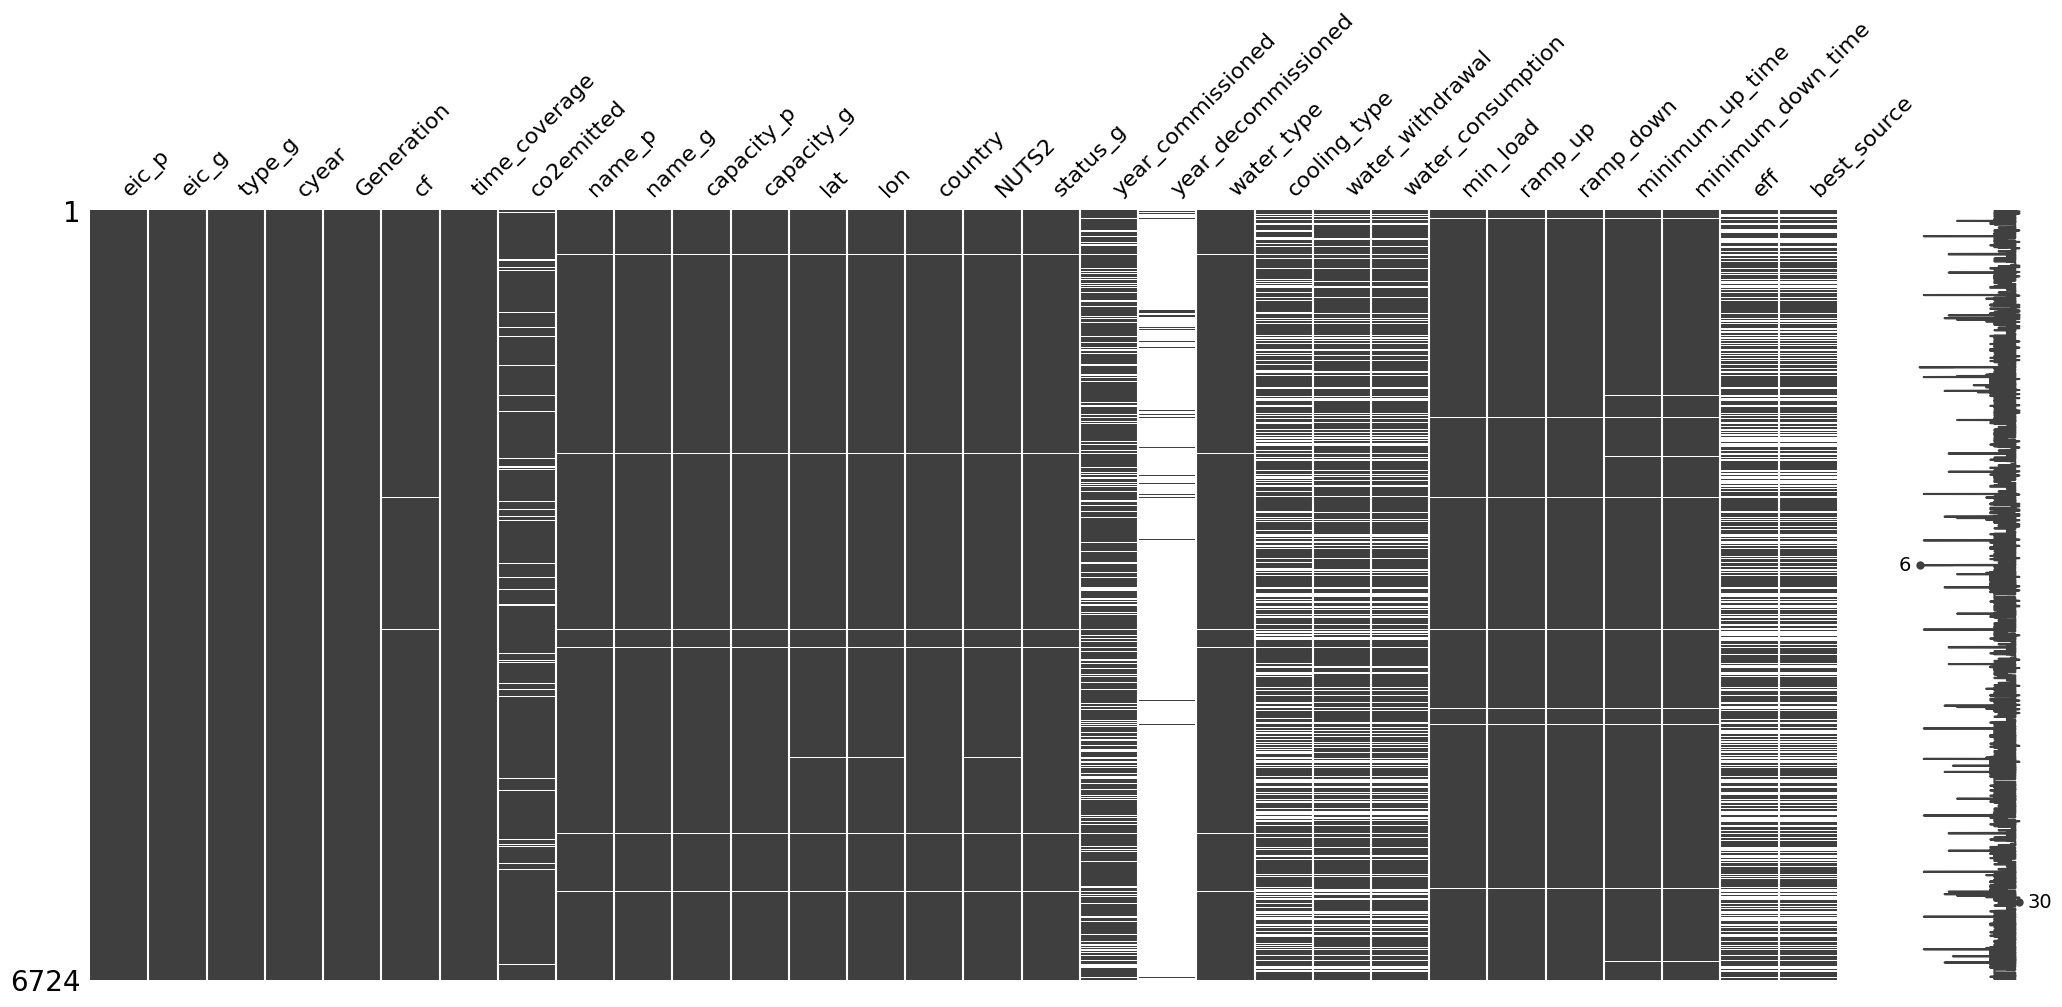

In [26]:
import missingno as msno

#Check missing data
msno.matrix(data)

## Remove and add features

In [27]:
plants = data['eic_p'] + ',' + data['eic_g']
plant_labels = plants.unique()
print('Number of records:',len(plants))
print('Number of unique plants:',len(plants.unique()))

Number of records: 6724
Number of unique plants: 1840


In [28]:
# Add renewables
print(data['type_g'].unique())
renewables = [0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1] # In the order as technologies apear in the previous line
mapping = dict(zip(data['type_g'].unique(), renewables))
print(mapping)

data['Renewable'] = data['type_g'].map(mapping)
data.head()

['Fossil Hard coal' 'Fossil Oil' 'Hydro Run-of-river and poundage'
 'Biomass' 'Fossil Gas' 'Fossil Brown coal/Lignite' 'Hydro Pumped Storage'
 'Hydro Water Reservoir' 'Fossil Peat' 'Nuclear' 'Wind Offshore'
 'Wind Onshore' 'Fossil Oil shale' 'Fossil Coal-derived gas' 'Geothermal'
 'Other' 'Waste']
{'Fossil Hard coal': 0, 'Fossil Oil': 0, 'Hydro Run-of-river and poundage': 1, 'Biomass': 1, 'Fossil Gas': 0, 'Fossil Brown coal/Lignite': 0, 'Hydro Pumped Storage': 1, 'Hydro Water Reservoir': 1, 'Fossil Peat': 0, 'Nuclear': 0, 'Wind Offshore': 1, 'Wind Onshore': 1, 'Fossil Oil shale': 0, 'Fossil Coal-derived gas': 0, 'Geothermal': 1, 'Other': 0, 'Waste': 1}


,eic_p,eic_g,type_g,cyear,Generation,cf,time_coverage,co2emitted,name_p,name_g,...,water_withdrawal,water_consumption,min_load,ramp_up,ramp_down,minimum_up_time,minimum_down_time,eff,best_source,Renewable
0,18WABO1-12345-0X,18WABO1-12345-D7,Fossil Hard coal,2015,1872563,0.626,1.000,1.940210e+09,ABOÑO 1,ABOÑO 1,...,137.59,0.95,0.479,0.009,-0.013,221.0,134.0,0.32,Class_derived,0
1,18WABO2-12345-0N,18WABO2-12345-DY,Fossil Hard coal,2015,4056615,0.864,1.000,3.842890e+09,ABOÑO 2,ABOÑO 2,...,137.59,0.95,0.280,0.011,-0.013,211.0,69.0,0.35,Class_derived,0
2,48WSTN0000ABTHBN,48W0000000ABTH7Y,Fossil Hard coal,2015,2216884,0.617,0.767,2.625680e+09,ABTHB,ABTH7,...,137.59,0.95,0.280,0.011,-0.013,211.0,69.0,0.30,emissions_16_derived,0
3,48WSTN000ABTHGTK,48W000000ABTH7G2,Fossil Oil,2015,12,0.706,0.000,1.309290e+04,ABTHGT,ABTH7G,...,0.10,0.10,0.182,0.013,-0.014,60.0,85.0,0.26,emissions_16_derived,0
4,48WSTN0000ABTHBN,48W0000000ABTH8W,Fossil Hard coal,2015,2308023,0.622,0.791,2.733620e+09,ABTHB,ABTH8,...,137.59,0.95,0.280,0.011,-0.013,211.0,69.0,0.30,emissions_16_derived,0


In [29]:
data.select_dtypes(include=['object']).nunique()

eic_p           1050
eic_g           1840
type_g            17
name_p          1027
name_g          1816
country           27
NUTS2            233
status_g           6
water_type         3
cooling_type       5
best_source        4
dtype: int64

In [30]:
data.dropna(subset=['co2emitted','capacity_g'], inplace=True) # Remove records without emission data
data.drop(labels=['eic_p','eic_g','cyear','name_p','name_g','year_decommissioned', 'NUTS2'], axis=1, inplace=True, errors='ignore')
# remove NUTS2 as it has a lot of possible values, may review later as the specific region may be an important feature

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6286 entries, 0 to 6723
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type_g             6286 non-null   object 
 1   Generation         6286 non-null   int64  
 2   cf                 6282 non-null   float64
 3   time_coverage      6286 non-null   float64
 4   co2emitted         6286 non-null   float64
 5   capacity_p         6286 non-null   float64
 6   capacity_g         6286 non-null   float64
 7   lat                6265 non-null   float64
 8   lon                6265 non-null   float64
 9   country            6286 non-null   object 
 10  status_g           6286 non-null   object 
 11  year_commissioned  5195 non-null   float64
 12  water_type         6286 non-null   object 
 13  cooling_type       4280 non-null   object 
 14  water_withdrawal   4705 non-null   float64
 15  water_consumption  4705 non-null   float64
 16  min_load           6245 

## Check correlations

In [32]:
# Create a correlation matrix
corr_metrics = data.corr()
corr_metrics.style.background_gradient()

C:\Users\danip\AppData\Local\Temp\ipykernel_26352\2897007505.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_metrics = data.corr()


,Generation,cf,time_coverage,co2emitted,capacity_p,capacity_g,lat,lon,year_commissioned,water_withdrawal,water_consumption,min_load,ramp_up,ramp_down,minimum_up_time,minimum_down_time,eff,Renewable
Generation,1.000000,0.649760,0.173187,0.336038,0.307177,0.829474,0.033504,-0.009199,0.155938,0.201743,0.351242,0.413944,-0.390187,0.273107,0.070230,0.704358,0.097274,-0.317695
cf,0.649760,1.000000,-0.113386,0.426969,0.282950,0.397635,0.223590,0.017680,0.045751,0.143912,0.319798,0.457626,-0.355305,0.223159,0.090535,0.443917,-0.080897,-0.270048
time_coverage,0.173187,-0.113386,1.000000,0.125821,0.078199,0.095223,-0.251411,0.293107,0.051946,0.132007,0.107384,0.168025,-0.143011,0.060801,-0.057773,0.125865,0.061083,-0.031096
co2emitted,0.336038,0.426969,0.125821,1.000000,0.458992,0.272422,0.037702,0.123624,0.098743,-0.103857,0.289062,0.264480,-0.235292,0.055844,-0.108152,-0.016164,-0.195875,-0.318271
capacity_p,0.307177,0.282950,0.078199,0.458992,1.000000,0.322709,-0.000207,0.034581,0.041365,-0.005034,0.377300,0.235740,-0.170167,0.042600,-0.077196,0.200964,-0.060488,-0.152585
capacity_g,0.829474,0.397635,0.095223,0.272422,0.322709,1.000000,-0.021597,-0.067016,0.275045,0.167397,0.295777,0.334867,-0.377884,0.229876,0.024423,0.578814,0.378620,-0.394517
lat,0.033504,0.223590,-0.251411,0.037702,-0.000207,-0.021597,1.000000,0.114124,-0.189213,0.112955,-0.011821,-0.016556,-0.029133,0.055623,0.156458,0.033735,-0.286493,0.010547
lon,-0.009199,0.017680,0.293107,0.123624,0.034581,-0.067016,0.114124,1.000000,-0.106269,0.106574,0.220732,0.278137,-0.239545,0.162710,-0.144076,0.079977,-0.352322,-0.182632
year_commissioned,0.155938,0.045751,0.051946,0.098743,0.041365,0.275045,-0.189213,-0.106269,1.000000,-0.204885,-0.272032,0.026898,-0.044589,0.006419,-0.020460,-0.037359,0.561216,-0.258431
water_withdrawal,0.201743,0.143912,0.132007,-0.103857,-0.005034,0.167397,0.112955,0.106574,-0.204885,1.000000,-0.065391,0.295459,-0.435346,0.316920,-0.080796,0.377231,-0.222034,-0.191773


## Replace missing data

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6286 entries, 0 to 6723
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type_g             6286 non-null   object 
 1   Generation         6286 non-null   int64  
 2   cf                 6282 non-null   float64
 3   time_coverage      6286 non-null   float64
 4   co2emitted         6286 non-null   float64
 5   capacity_p         6286 non-null   float64
 6   capacity_g         6286 non-null   float64
 7   lat                6265 non-null   float64
 8   lon                6265 non-null   float64
 9   country            6286 non-null   object 
 10  status_g           6286 non-null   object 
 11  year_commissioned  5195 non-null   float64
 12  water_type         6286 non-null   object 
 13  cooling_type       4280 non-null   object 
 14  water_withdrawal   4705 non-null   float64
 15  water_consumption  4705 non-null   float64
 16  min_load           6245 

In [34]:
data.groupby('type_g')['eff'].mean()  # All efficiency missing values are renewables

type_g
Biomass                            0.292727
Fossil Brown coal/Lignite          0.328346
Fossil Gas                         0.478508
Fossil Hard coal                   0.337374
Fossil Oil                         0.327657
Fossil Oil shale                   0.305385
Hydro Pumped Storage                    NaN
Hydro Run-of-river and poundage         NaN
Hydro Water Reservoir                   NaN
Nuclear                                 NaN
Wind Offshore                           NaN
Wind Onshore                            NaN
Name: eff, dtype: float64

In [35]:
# Replace renewables with efficiency of 1
data.fillna(value={'eff':1}, inplace=True)

In [36]:
data = data[data['capacity_g'] > 0] # Remove plants with 0 value for capacity

## Save resulting data

In [37]:
data.head()

,type_g,Generation,cf,time_coverage,co2emitted,capacity_p,capacity_g,lat,lon,country,...,water_withdrawal,water_consumption,min_load,ramp_up,ramp_down,minimum_up_time,minimum_down_time,eff,best_source,Renewable
0,Fossil Hard coal,1872563,0.626,1.000,1.940210e+09,341.7,341.7,43.538,-5.671,Spain,...,137.59,0.95,0.479,0.009,-0.013,221.0,134.0,0.32,Class_derived,0
1,Fossil Hard coal,4056615,0.864,1.000,3.842890e+09,535.8,535.8,43.538,-5.671,Spain,...,137.59,0.95,0.280,0.011,-0.013,211.0,69.0,0.35,Class_derived,0
2,Fossil Hard coal,2216884,0.617,0.767,2.625680e+09,1590.0,535.0,51.387,-3.407,United Kingdom,...,137.59,0.95,0.280,0.011,-0.013,211.0,69.0,0.30,emissions_16_derived,0
3,Fossil Oil,12,0.706,0.000,1.309290e+04,51.0,17.0,51.387,-3.407,United Kingdom,...,0.10,0.10,0.182,0.013,-0.014,60.0,85.0,0.26,emissions_16_derived,0
4,Fossil Hard coal,2308023,0.622,0.791,2.733620e+09,1590.0,535.0,51.387,-3.407,United Kingdom,...,137.59,0.95,0.280,0.011,-0.013,211.0,69.0,0.30,emissions_16_derived,0


In [38]:
# Save resulting data to use in modelling
data.to_csv('MODELLING DATA/model_data.csv', index=False)